## Yatsa Data Analytics

Yatsa is company that helps you track and manage your assets better. 
This notebook is a quick look at the data that Yatsa collects from their user's assets and the trips the assets being tracked have made. The goal of the analytics is to provide insights from the data and answer the following business questions:
- What is the average distance travelled by vehicles in a day, week or month?
- What are the most common destination for vehicles and how frequent do they travel to  these destinations?

### Extra
- Any trends in driver behaviour for example speeding?
- Any pattern or trends in the types of trips made by vehicles for example: do smaller vehicles travel through smaller distances.

`trips.json` file is too large to be uploaded to github. It can be download from [here](https://drive.google.com/drive/folders/1cVddbKWqv8B9NF6B0ALS3Rv4vZAxEi1Z?usp=share_link)

In [1]:
import pandas as pd
assets = pd.read_json('Data/assets.json')

In [48]:
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006.0
1,DpXMzg3,Lexus CT 200h,CT 200h,NaN
2,4tQe9sV,Honda Odyssey,Odyssey,NaN
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005.0
4,eH0O4bf,Nissan,Note,2011.0


In [46]:
import json

In [2]:
with open('Data/trips.json') as f:
    trips = json.load(f)

In [8]:
print(trips[0])

{'id': '35Ldjpf', 'created': '2022-03-14T17:31:51.003+00:00', 'asset_id': '0ROajub', 'origin': {'latitude': -1.043220043182373, 'longitude': 37.067928314208984, 'time_stamp': '2022-03-14T17:31:47+00:00', 'address': 'Thika Garissa Highway, Total, Thika, Kenya', 'odometer': None}, 'destination': {'latitude': -1.041213035583496, 'longitude': 37.09260177612305, 'time_stamp': '2022-03-14T17:54:07+00:00', 'address': 'Kenyatta Highway, Thika, Kiambu County, Kenya', 'odometer': None}, 'distance': 4321.65, 'points': [{'bearing': 0.0, 'location': {'latitude': -1.0429808391339757, 'longitude': 37.06797081001906}, 'original_index': 0, 'place_id': 'ChIJZdR1aZNOLxgRKyV34jTxzi8'}, {'bearing': -79.92785342956121, 'location': {'latitude': -1.0429532741480045, 'longitude': 37.06781559845453}, 'original_index': 1, 'place_id': 'ChIJZdR1aZNOLxgRKyV34jTxzi8'}, {'bearing': -79.92785060439225, 'location': {'latitude': -1.0429239, 'longitude': 37.067650199999996}, 'original_index': 0, 'place_id': 'ChIJZdR1aZNO

In [36]:
columns = []
columns.append('id')
columns.append('created')
columns.append('asset_id')
columns.append('distance')
data_origin = trips[3]['origin']
data_destination = trips[4]['destination']
data_points = trips[6]['points'][0]
for key in data_origin.keys():
    if key not in columns:
        columns.append('origin_' + key)
for key in data_destination.keys():
    if key not in columns:
        columns.append('destination_' + key)
for k, v in data_points.items():
    if k not in columns:
        if k == 'location':
            for key in v.keys():
                if key not in columns:
                    columns.append('point_' + key)
        else:
            columns.append('point_' + k)
print(columns)


['id', 'created', 'asset_id', 'distance', 'origin_latitude', 'origin_longitude', 'origin_time_stamp', 'origin_address', 'origin_odometer', 'destination_latitude', 'destination_longitude', 'destination_time_stamp', 'destination_address', 'destination_odometer', 'point_bearing', 'point_latitude', 'point_longitude', 'point_original_index', 'point_place_id']


In [39]:
trips_df = pd.DataFrame(columns=columns)
# fill the dataframe columns with trips data 

In [43]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.04322,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",None,0.0,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",None,0.0,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.30549,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.75983,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",None,0.0,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


`Load` data into a Pandas dataframe from the CSV file in the `Data` folder. Do not run the two code cells below as it will take much time to execute.

In [42]:
for i, trip in enumerate(trips):
    trips_df.loc[i, 'id'] = trip['id']
    trips_df.loc[i, 'created'] = trip['created']
    trips_df.loc[i, 'asset_id'] = trip['asset_id']
    trips_df.loc[i, 'distance'] = trip['distance']
    for key, value in trip['origin'].items():
        trips_df.loc[i, 'origin_' + key] = value
    for key, value in trip['destination'].items():
        trips_df.loc[i, 'destination_' + key] = value
    for i, v in enumerate(trip['points']):
        for key, value in v.items():
            if key == 'location':
                for k, v in value.items():
                    trips_df.loc[i, 'point_' + k] = v
            else:
                trips_df.loc[i, 'point_' + key] = value

In [44]:
# save the trips_df to csv file
trips_df.to_csv('Data/trips_df.csv', index=False)

Execute the code cells below to start working with trips data.

In [2]:
trips_df = pd.read_csv('Data/trips_df.csv')

In [3]:
trips_df.shape

(6703, 19)

In [4]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,origin_odometer,destination_latitude,destination_longitude,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,0.0,4804.000000,4804.000000,0.0,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,NaN,-1.033224,36.911758,NaN,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,NaN,0.435225,0.411621,NaN,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,NaN,-3.328162,34.217648,NaN,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,NaN,-1.249770,36.824720,NaN,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,NaN,-1.126177,36.993961,NaN,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,NaN,-1.051691,37.092073,NaN,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,NaN,1.256327,40.126652,NaN,180.000000,1.024317,37.094406,99.000000


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

In [6]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",NaN,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",NaN,0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",NaN,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",NaN,0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


In [7]:
trips_df.tail()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
6698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.326052,-1.289222,36.791666,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.738238,-1.289234,36.791669,41,ChIJs_apPKUQLxgRFj_nEgRciEw
6700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.738238,-1.289438,36.791713,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-144.286924,-1.289483,36.791681,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-93.347666,-1.289484,36.791662,42,ChIJs_apPKUQLxgRFj_nEgRciEw


In [8]:
numerical_variables = trips_df.select_dtypes(include=[np.number])
numerical_variables.columns

Index(['distance', 'origin_latitude', 'origin_longitude', 'origin_odometer',
       'destination_latitude', 'destination_longitude', 'destination_odometer',
       'point_bearing', 'point_latitude', 'point_longitude',
       'point_original_index'],
      dtype='object')

In [9]:
trips_df.dtypes

id                         object
created                    object
asset_id                   object
distance                  float64
origin_latitude           float64
origin_longitude          float64
origin_time_stamp          object
origin_address             object
origin_odometer           float64
destination_latitude      float64
destination_longitude     float64
destination_time_stamp     object
destination_address        object
destination_odometer      float64
point_bearing             float64
point_latitude            float64
point_longitude           float64
point_original_index        int64
point_place_id             object
dtype: object

In [10]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4804 non-null   object 
 1   created                 4804 non-null   object 
 2   asset_id                4804 non-null   object 
 3   distance                4804 non-null   float64
 4   origin_latitude         4804 non-null   float64
 5   origin_longitude        4804 non-null   float64
 6   origin_time_stamp       4804 non-null   object 
 7   origin_address          4803 non-null   object 
 8   origin_odometer         0 non-null      float64
 9   destination_latitude    4804 non-null   float64
 10  destination_longitude   4804 non-null   float64
 11  destination_time_stamp  4804 non-null   object 
 12  destination_address     4803 non-null   object 
 13  destination_odometer    0 non-null      float64
 14  point_bearing           6703 non-null   

In [11]:
trips_df.isna().sum()

id                        1899
created                   1899
asset_id                  1899
distance                  1899
origin_latitude           1899
origin_longitude          1899
origin_time_stamp         1899
origin_address            1900
origin_odometer           6703
destination_latitude      1899
destination_longitude     1899
destination_time_stamp    1899
destination_address       1900
destination_odometer      6703
point_bearing                0
point_latitude               0
point_longitude              0
point_original_index         0
point_place_id               0
dtype: int64

<AxesSubplot: >

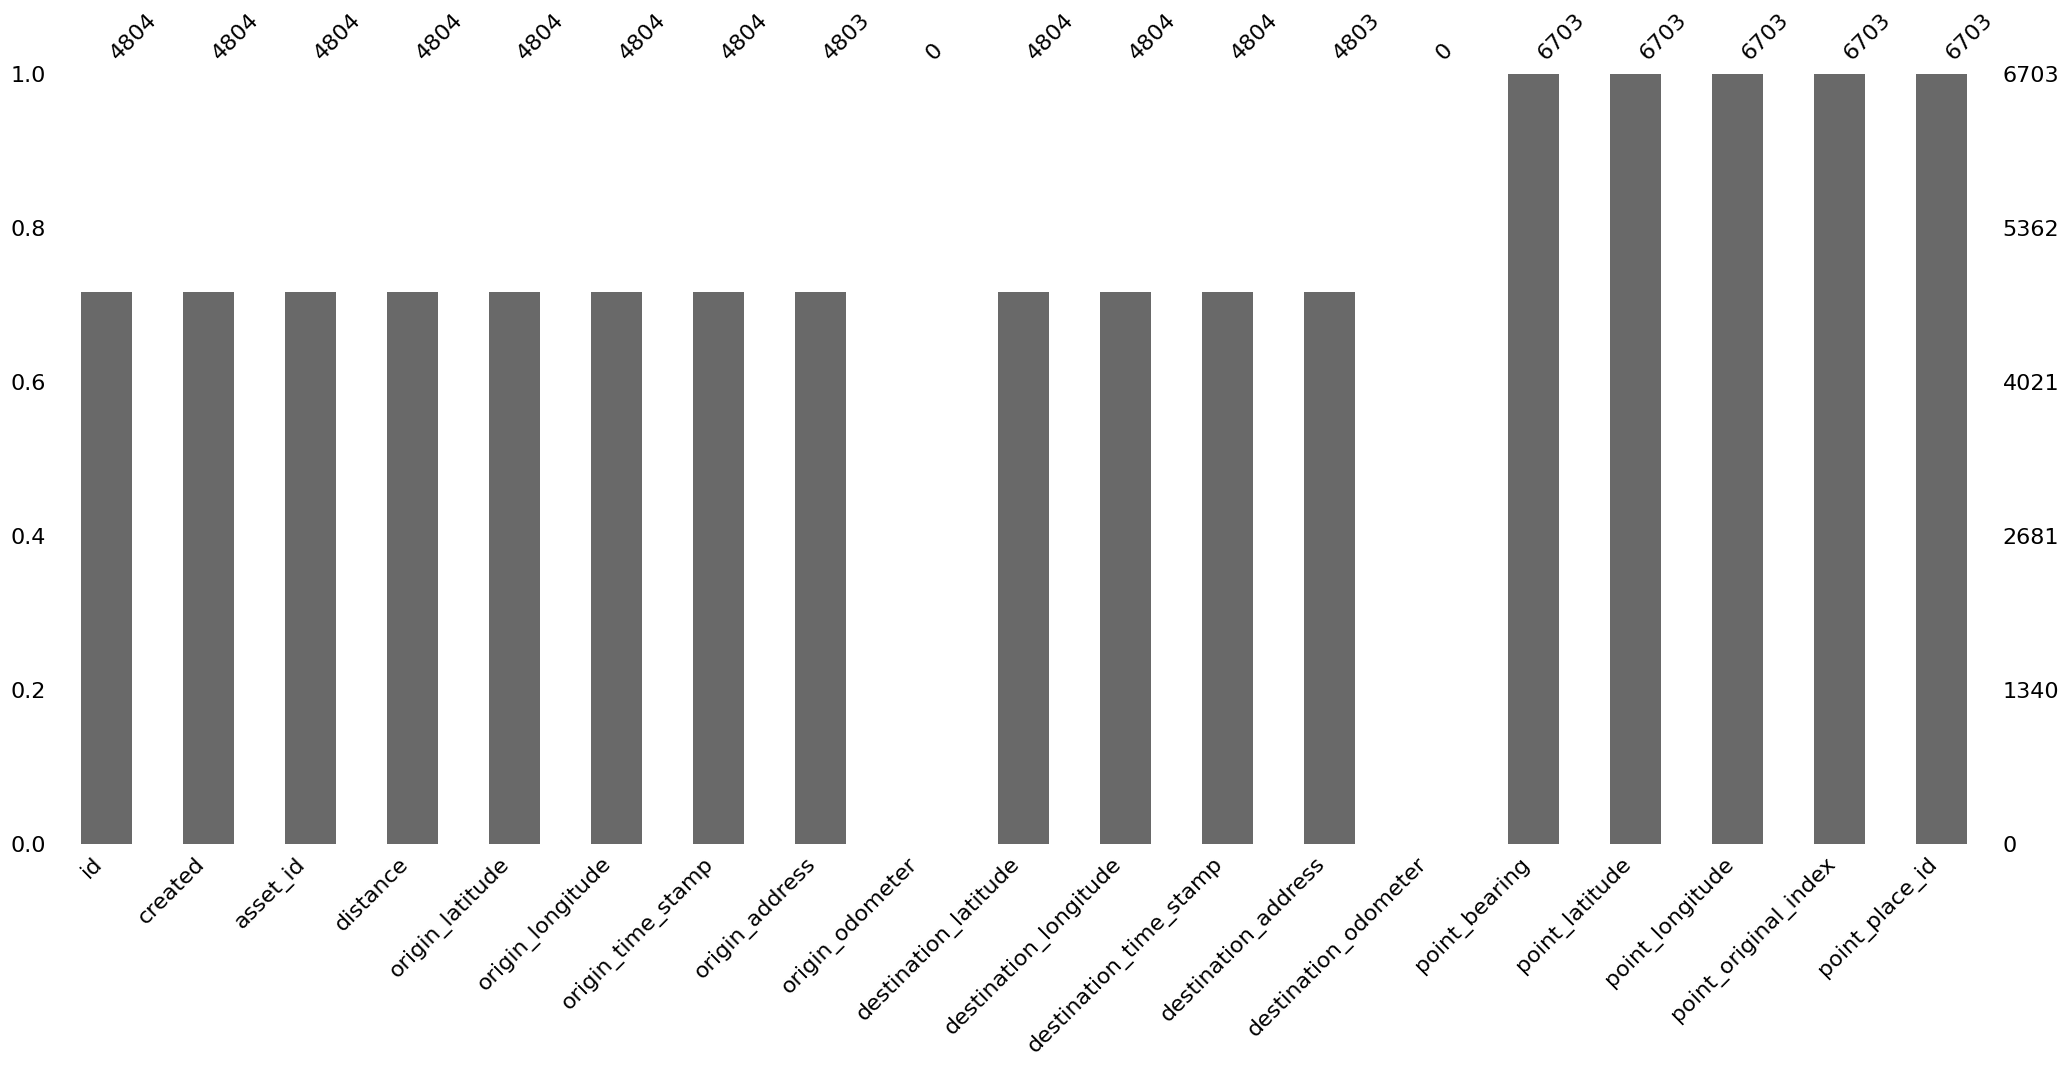

In [12]:
import missingno as msno
msno.bar(trips_df)

In [13]:
trips_df.drop(['origin_odometer','destination_odometer'], axis=1, inplace=True)

In [14]:
correlations = trips_df.corr()
correlations

C:\Users\user\AppData\Local\Temp\ipykernel_3304\2257670618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = trips_df.corr()


,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude,point_bearing,point_latitude,point_longitude,point_original_index
distance,1.000000,0.058569,-0.098636,0.056657,-0.105194,-0.006088,-0.060423,0.063579,-0.007823
origin_latitude,0.058569,1.000000,-0.588901,0.979373,-0.583615,-0.043782,0.113590,-0.105551,0.014955
origin_longitude,-0.098636,-0.588901,1.000000,-0.585283,0.978476,0.017809,-0.223143,0.208373,0.022018
destination_latitude,0.056657,0.979373,-0.585283,1.000000,-0.591137,-0.044319,0.113407,-0.105368,0.011619
destination_longitude,-0.105194,-0.583615,0.978476,-0.591137,1.000000,0.015612,-0.223736,0.208962,0.020179
point_bearing,-0.006088,-0.043782,0.017809,-0.044319,0.015612,1.000000,-0.064222,0.067549,-0.056575
point_latitude,-0.060423,0.113590,-0.223143,0.113407,-0.223736,-0.064222,1.000000,-0.979499,-0.008405
point_longitude,0.063579,-0.105551,0.208373,-0.105368,0.208962,0.067549,-0.979499,1.000000,-0.006018
point_original_index,-0.007823,0.014955,0.022018,0.011619,0.020179,-0.056575,-0.008405,-0.006018,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_3304\2874803067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(trips_df.corr(), cmap="YlGnBu", annot=True)


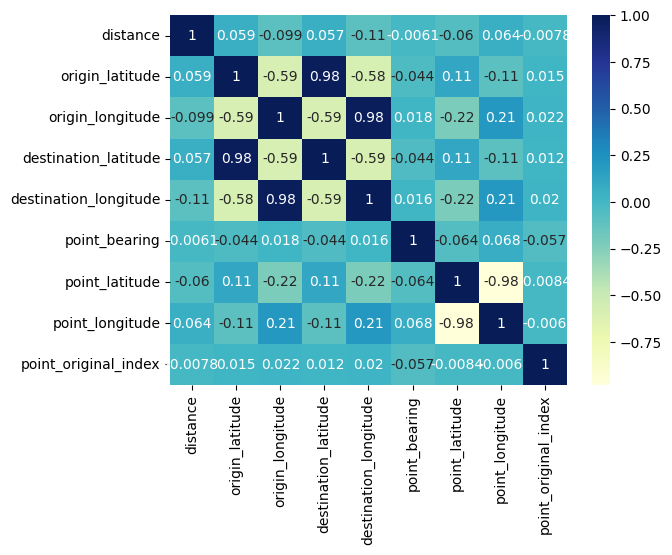

In [15]:
dataplot = sns.heatmap(trips_df.corr(), cmap="YlGnBu", annot=True)

In [16]:

print(trips_df.melt().value.value_counts())

0.0                                            7610
Thika, Kiambu County, Kenya                     902
Ruiru, Kiambu County, Kenya                     342
Kiandutu Slums, Thika, Kiambu County, Kenya     340
A3, Thika, Kiambu County, Kenya                 329
                                               ... 
-1.2887229919433594                               1
-1.2952090501785278                               1
-1.2876830101013184                               1
-1.2983490228652954                               1
2023-02-24T14:17:54+00:00                         1
Name: value, Length: 54495, dtype: int64


In [24]:
trips_df1 = trips_df.dropna(thresh=6)
trips_df1

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,GeaklYd,2023-02-21T11:41:10.948+00:00,3XBsRFw,13803.78,-1.040364,37.069199,2023-02-21T11:41:06+00:00,"385 Mombasa Road, Thika, Kiambu County, Kenya",-1.040391,37.069256,2023-02-21T12:40:11+00:00,"OAU Road, Thika, Kiambu County, Kenya",-55.829227,0.609110,35.196526,0,ChIJb_ViGRKogRcRYC9OR9JluxE
4800,NSzqS6B,2023-02-21T10:17:02.952+00:00,3XBsRFw,4968.03,-1.040324,37.069244,2023-02-21T10:16:54+00:00,"385 OAU Road, Thika, Kiambu County, Kenya",-1.040152,37.068432,2023-02-21T10:37:45+00:00,"Enterprise Road, Thika, Kenya",-69.683318,0.609128,35.196476,0,ChIJb_ViGRKogRcRYC9OR9JluxE
4801,jMW6L4T,2023-02-21T09:15:30.916+00:00,3XBsRFw,10180.62,-1.047289,37.073498,2023-02-21T09:15:27+00:00,"Garissa Road, Thika, Kiambu County, Kenya",-1.040326,37.069077,2023-02-21T10:05:40+00:00,"OAU Road, Thika, Kiambu County, Kenya",-84.799812,0.609137,35.196382,0,ChIJb_ViGRKogRcRYC9OR9JluxE
4802,pNnBGll,2023-02-21T08:41:38.993+00:00,3XBsRFw,3134.15,-1.042714,37.068249,2023-02-21T08:41:32+00:00,"30, Thika, Kenya",-1.047387,37.073387,2023-02-21T08:51:28+00:00,"Garissa Road, Thika, Kiambu County, Kenya",0.000000,0.609137,35.196382,0,ChIJW2sUUgyogRcREfCnHoRbZx0


In [25]:
trips_df1.columns.values

array(['id', 'created', 'asset_id', 'distance', 'origin_latitude',
       'origin_longitude', 'origin_time_stamp', 'origin_address',
       'destination_latitude', 'destination_longitude',
       'destination_time_stamp', 'destination_address', 'point_bearing',
       'point_latitude', 'point_longitude', 'point_original_index',
       'point_place_id'], dtype=object)